In [1]:
cd ../

/mnt/NVME1TB/Projects/people-with-glasses-classifier


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import os
import os.path as osp
import random
import numpy as np

# CelebFaces Attributes (CelebA) Dataset
https://www.kaggle.com/jessicali9530/celeba-dataset

In [4]:
dataset_fld = 'data/celeba-dataset/'
img_fld = osp.join(dataset_fld, 'img_align_celeba/img_align_celeba')

In [5]:
# extract labels
celeba_df = pd.read_csv(osp.join(dataset_fld, 'list_attr_celeba.csv'))
celeba_df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [6]:
celeba_df.Eyeglasses.value_counts()

-1    189406
 1     13193
Name: Eyeglasses, dtype: int64

In [7]:
celeba_df['filename'] =  img_fld + '/' + celeba_df['image_id']

In [8]:
celeba_df['has_glasses'] = celeba_df.Eyeglasses
celeba_df.loc[celeba_df.has_glasses == -1, 'has_glasses'] = 0
celeba_df['dataset'] = 'celeba'

In [9]:
celeba_df[['image_id', 'filename', 'has_glasses']].head()

,image_id,filename,has_glasses
0,000001.jpg,data/celeba-dataset/img_align_celeba/img_align...,0
1,000002.jpg,data/celeba-dataset/img_align_celeba/img_align...,0
2,000003.jpg,data/celeba-dataset/img_align_celeba/img_align...,0
3,000004.jpg,data/celeba-dataset/img_align_celeba/img_align...,0
4,000005.jpg,data/celeba-dataset/img_align_celeba/img_align...,0


# MeGlass Dataset
https://github.com/cleardusk/MeGlass

In [10]:
dataset_fld = 'data/MeGlass/'
img_fld = osp.join(dataset_fld, 'MeGlass_120x120')

In [11]:
# meta file with info about glasses
fname2glasses = {}
with open(osp.join(dataset_fld, 'meta.txt')) as f:
    for line in f.readlines():
        fname, has_glasses = line.split(' ')
        fname2glasses[fname] = int(has_glasses)

In [12]:
# create person index
dicts = []
for fname in os.listdir(img_fld):
    uid = fname.split('@')[0]
    dicts.append({
        'id': uid,
        'image_id': fname, 
        'filename': osp.join(img_fld, fname),
        'has_glasses': fname2glasses[fname],
        'dataset': 'meglass',
    })
meglass_df = pd.DataFrame(dicts)

In [13]:
meglass_df.head()

,dataset,filename,has_glasses,id,image_id
0,meglass,data/MeGlass/MeGlass_120x120/10032527@N08_iden...,0,10032527,10032527@N08_identity_4@2582182573_0.jpg
1,meglass,data/MeGlass/MeGlass_120x120/10032527@N08_iden...,0,10032527,10032527@N08_identity_4@2582191559_0.jpg
2,meglass,data/MeGlass/MeGlass_120x120/10032527@N08_iden...,0,10032527,10032527@N08_identity_4@2582274191_0.jpg
3,meglass,data/MeGlass/MeGlass_120x120/10032527@N08_iden...,0,10032527,10032527@N08_identity_4@2583119706_0.jpg
4,meglass,data/MeGlass/MeGlass_120x120/10032527@N08_iden...,1,10032527,10032527@N08_identity_4@2589966003_0.jpg


# SoF Dataset
https://sites.google.com/view/sof-dataset

In [14]:
dataset_fld = 'data/SoF/'
img_fld = osp.join(dataset_fld, '640x480')

In [15]:
# create person index
dicts = []
for fname in os.listdir(img_fld):
    dicts.append({
        'image_id': fname, 
        'filename': osp.join(img_fld, fname),
        'has_glasses': 1,
        'dataset': 'sof',
    })
sof_df = pd.DataFrame(dicts)

In [16]:
sof_df.head()

,dataset,filename,has_glasses,image_id
0,sof,data/SoF/640x480/AbdA_00001_m_31_i_fr_nc_no_20...,1,AbdA_00001_m_31_i_fr_nc_no_2016_2_e0_nl_o.jpg
1,sof,data/SoF/640x480/AbdA_00002_m_31_i_fr_nc_sr_20...,1,AbdA_00002_m_31_i_fr_nc_sr_2016_2_e0_nl_o.jpg
2,sof,data/SoF/640x480/AbdA_00003_m_31_i_fr_nc_hp_20...,1,AbdA_00003_m_31_i_fr_nc_hp_2016_2_e0_nl_o.jpg
3,sof,data/SoF/640x480/AbdA_00004_m_31_i_fr_nc_hp_20...,1,AbdA_00004_m_31_i_fr_nc_hp_2016_2_e0_nl_o.jpg
4,sof,data/SoF/640x480/AbdA_00005_m_31_i_fr_nc_hp_20...,1,AbdA_00005_m_31_i_fr_nc_hp_2016_2_e0_nl_o.jpg


# SPECFACE Dataset
https://sites.google.com/site/specfaceiitkgp

In [17]:
dataset_fld = 'data/specface/'

In [18]:
dicts = []
for i in range(1, 61):
    img_fld = osp.join(dataset_fld, f'{i:02}')
    for fname in os.listdir(img_fld):
        dicts.append({
            'image_id': fname, 
            'filename': osp.join(img_fld, fname),
            'has_glasses': 1,
            'dataset': 'specface',
        })
specface_df = pd.DataFrame(dicts)

In [19]:
specface_df.head()

,dataset,filename,has_glasses,image_id
0,specface,data/specface/01/image (1).jpg,1,image (1).jpg
1,specface,data/specface/01/image (2).jpg,1,image (2).jpg
2,specface,data/specface/01/image (3).jpg,1,image (3).jpg
3,specface,data/specface/01/image (4).jpg,1,image (4).jpg
4,specface,data/specface/02/image (1).jpg,1,image (1).jpg


# Concatenated dataset

In [25]:
final_cols = ['dataset', 'image_id', 'has_glasses', 'filename']
df = pd.concat([celeba_df, specface_df, sof_df, meglass_df], ignore_index=True, sort=False)[final_cols]

In [26]:
df.groupby(['dataset', 'has_glasses']).size()

dataset   has_glasses
celeba    0              189406
          1               13193
meglass   0               33085
          1               14832
sof       1                2428
specface  1                 320
dtype: int64

# Crop and save faces with dlib

In [30]:
import cv2
from tqdm.auto import tqdm
from modules.common import par_apply
from modules.utils import crop_img, open_img, resize_shortest_edge

In [31]:
def get_random_image(fld):
    fname = random.sample(os.listdir(fld), 1)[0]
    fp = osp.join(fld, fname)
    img = open_img(fp)
    return img

,dataset,image_id,has_glasses,filename
132961,celeba,132962.jpg,0,data/celeba-dataset/img_align_celeba/img_align...


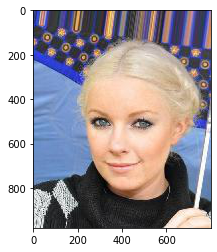

In [33]:
sample_row = df[df.dataset == 'celeba'].sample(1)
fp = sample_row.filename.iloc[0]
img = open_img(fp)
img = resize_shortest_edge(img, 800, 600)
plt.imshow(img)
sample_row

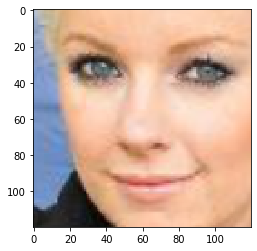

In [34]:
crop = crop_img(img)
crop = cv2.resize(crop, (120, 120))
plt.imshow(crop)

In [189]:
fld = 'data/crops/'

def process(data):
    try:
        ind, row = data
        img = open_img(row.filename)
        if img.shape[0] > 600 or img.shape[1] > 600:
            img = resize_shortest_edge(img, 800, 600)
        crop = crop_img(img)
        crop = cv2.resize(crop, (120, 120))
        crop_fp = osp.join(fld, f'{ind:06}.jpg')
        plt.imsave(crop_fp, crop)
    except Exception as e:
        print(e)

In [ ]:
par_apply(df.iterrows(), process, length=len(df), verbose=1, n_jobs=4)

In [233]:
crop_paths = [osp.join(fld, f'{i:06}.jpg') for i in df.index]
df['crop_path'] = crop_paths

# Split dataset

In [35]:
from sklearn.model_selection import GroupKFold, StratifiedKFold

In [36]:
df['fold_num'] = -1
kfold = StratifiedKFold(n_splits=5, random_state=88)
for fold_num, (train_ids, valid_ids) in enumerate(kfold.split(df.index, y=df.dataset)):
    df.loc[valid_ids, 'fold_num'] = fold_num
    
df.to_csv('data/all.csv', index=False)

In [37]:
df.groupby(['fold_num', 'dataset', 'has_glasses']).size()

fold_num  dataset   has_glasses
0         celeba    0              37899
                    1               2621
          meglass   0               7764
                    1               1820
          sof       1                486
          specface  1                 64
1         celeba    0              37861
                    1               2659
          meglass   0               7664
                    1               1920
          sof       1                486
          specface  1                 64
2         celeba    0              37953
                    1               2567
          meglass   0               7791
                    1               1792
          sof       1                486
          specface  1                 64
3         celeba    0              37892
                    1               2628
          meglass   0               5975
                    1               3608
          sof       1                485
          specface  1    